# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

Rank= 492


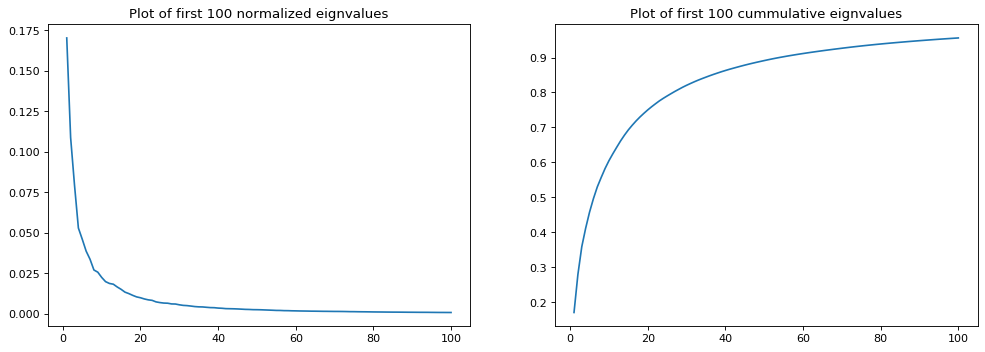

In [2]:
# Samples corresponding to the last digit of your roll number (plot a)

train_data_corresponding_6 = train_data[train_labels == 6]
test_data_corresponding_6 = test_data[test_labels == 6]

m,_ = test_data_corresponding_6.shape

mu = np.mean(train_data_corresponding_6,axis=0)

cov = np.matmul((train_data_corresponding_6 - mu).T,train_data_corresponding_6 - mu)/ (m)

w,_ = np.linalg.eig(cov)

w = np.real(w)
print("Rank=",np.sum(w!=0))
w = np.sort(w)[::-1]
s = np.sum(w)
w_norm = w/s
w_norm = w_norm[:100]

plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.plot(range(1,101),w_norm)
plt.title("Plot of first 100 normalized eignvalues")
plt.subplot(122)
plt.plot(range(1,101),np.cumsum(w_norm))
plt.title("Plot of first 100 cummulative eignvalues")
plt.show()

Rank= 508


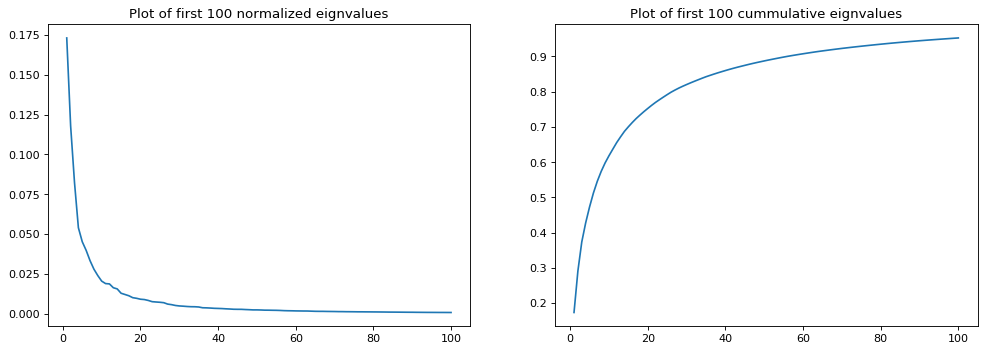

In [3]:
# Samples corresponding to the last digit of (your roll number + 1) % 10 (plot b)

train_data_corresponding_7 = train_data[train_labels == 7]
test_data_corresponding_7 = test_data[test_labels == 7]

m,_ = train_data_corresponding_7.shape

mu = np.mean(train_data_corresponding_7,axis=0)

cov = np.matmul((train_data_corresponding_7 - mu).T,train_data_corresponding_7 - mu)/ (m)

w,_ = np.linalg.eig(cov)

w = np.real(w)
w = np.sort(w)[::-1]
print("Rank=",np.sum(w!=0))
s = np.sum(w)
w_norm = w/s
w_norm = w_norm[:100]

plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.plot(range(1,101),w_norm)
plt.title("Plot of first 100 normalized eignvalues")
plt.subplot(122)
plt.plot(range(1,101),np.cumsum(w_norm))
plt.title("Plot of first 100 cummulative eignvalues")
plt.show()

Rank= 667


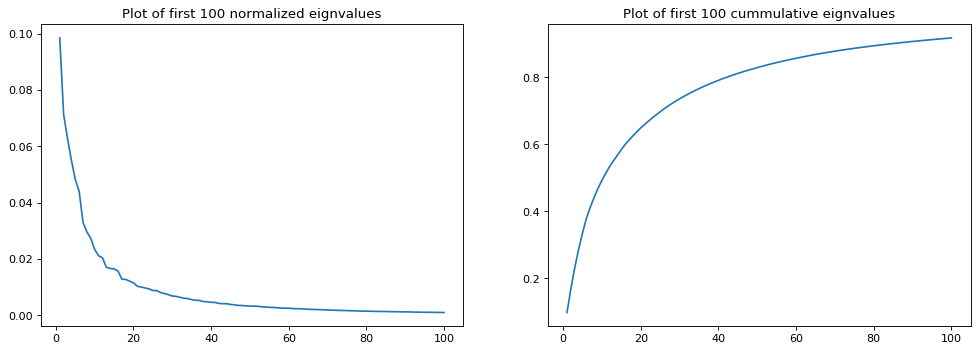

In [4]:
# All training data (plot c)
m,_ = train_data.shape

mu = np.mean(train_data,axis=0)

cov = np.matmul((train_data - mu).T,train_data - mu)/ (m)

w,_ = np.linalg.eig(cov)

w = np.real(w)
w = np.sort(w)[::-1]
print("Rank=",np.sum(w!=0))
s = np.sum(w)
w_norm = w/s
w_norm = w_norm[:100]

plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.plot(range(1,101),w_norm)
plt.title("Plot of first 100 normalized eignvalues")
plt.subplot(122)
plt.plot(range(1,101),np.cumsum(w_norm))
plt.title("Plot of first 100 cummulative eignvalues")
plt.show()

Rank= 639


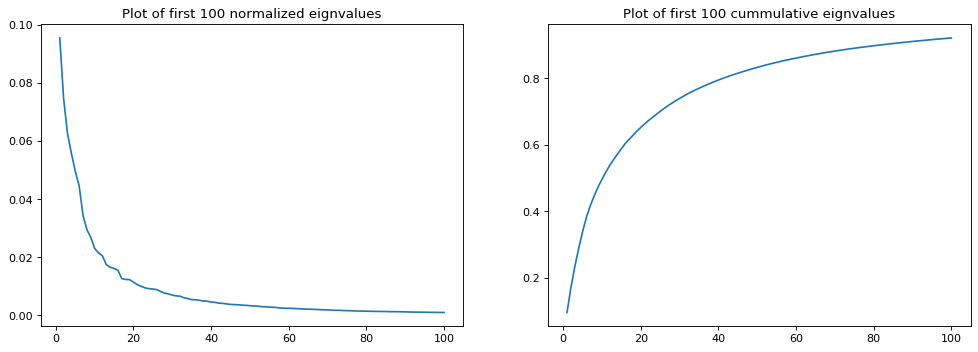

In [5]:
# Randomly selected 50% of the training data (plot d)
indexes = np.random.randint(0,m,m//2)
train_data_half = train_data[indexes]

mu = np.mean(train_data_half,axis=0)
m,_ = train_data_half.shape

cov = np.matmul((train_data_half - mu).T,train_data_half - mu)/ (m)

w,_ = np.linalg.eig(cov)
w = np.real(w)
w = np.sort(w)[::-1]
print("Rank=",np.sum(w!=0))
s = np.sum(w)
w_norm = w/s
w_norm = w_norm[:100]

plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.plot(range(1,101),w_norm)
plt.title("Plot of first 100 normalized eignvalues")
plt.subplot(122)
plt.plot(range(1,101),np.cumsum(w_norm))
plt.title("Plot of first 100 cummulative eignvalues")
plt.show()

### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

---
- Plots a and b have subtle differences which is expected because both are on different digits,that is shape structure information which are carried by both are different, however, at the same time the distribution of points is quite similar for digits 6 and 7 so they have similar structure overall.

- Plots b and c are also minutely different but overall they have same charactersistics as both follow nearly similar distributions.

- Approximate ranks are as follows - 
    - a. 492 ~ 50 significant 
    - b. 508 ~ 50 significant
    - c. 667 ~ 70 significant
    - d. 641 ~ 60 significant
---

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

---
- There are 728 pixels so there can be $2^{784}$ binary images.
- We have access to 6000(train_data) and 1000(test_data) images which is about $\frac{7*10^{5}}{2^{728}}$ % which is ~ 0 %
- If we had access to all the data, the eign value spectrum would have been all non -zeros and equal because each of them will carry informantion for 786 degrees of freedom. The covariance matrix would be full rank. This can also PCA where we need to capture variances in all 784 directions hence we need those many princpal axis, with all equal covariance matrixes.
--- 

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

--------------
Multiplication with orthonormal matrixes is same as linear transformation of rotation, as orthonormal matrixes are rotation matrixes, since eignvector is a vector along which matrix does only scaling, rotatation only rotatates the vector however, to does so uniformly in all directions so there would be no change to value. 

$\sum{} = (X - \mu)^T (X - \mu)$

$\sum{} = S^TDS$ (on SVD)

$X' = XQ$ and $\mu^{\prime} = {\mu}Q$.

$\sum{}' = Q^T(X - \mu)^T (X - \mu)Q$

$\sum{}' = Q^T \sum{}Q$

$\sum{}' = Q^TS^TDSQ$

$\sum{}' = (SQ)^TD(SQ)$

Q' = SQ as orthonormal times orthonormal is orthonormal

Therefore the diagonal parth remains unchanged. 

This implies eigenvalues remains unchanged.

--------------

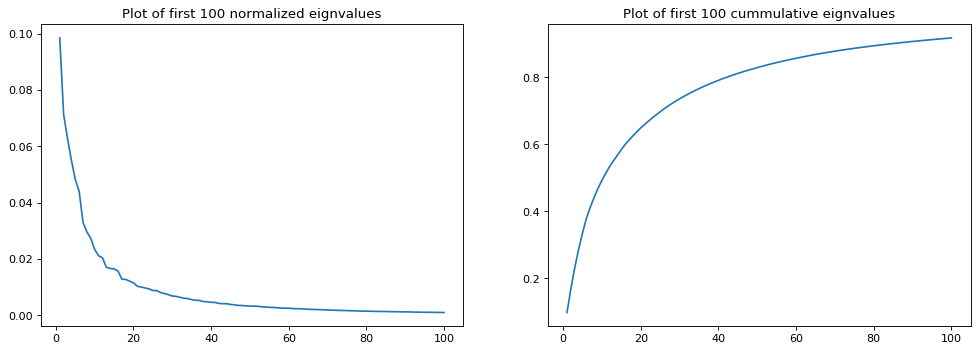

In [6]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
# eigen value specturm of the new covariance matrix.
# code goes here

_,n = train_data.shape

random_matrix = np.random.rand(n,n)
orthonormal_matrix,_,_ = np.linalg.svd(random_matrix)
train_data_modified = np.matmul(train_data,orthonormal_matrix)

m,_ = train_data.shape
mu = np.mean(train_data_modified,axis=0)
cov = np.matmul((train_data_modified - mu).T,train_data_modified - mu)/ (m)

w,_ = np.linalg.eig(cov)
w = np.real(w)
w = np.sort(w)[::-1]
s = np.sum(w)
w_norm = w/s
w_norm = w_norm[:100]

plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.plot(range(1,101),w_norm)
plt.title("Plot of first 100 normalized eignvalues")
plt.subplot(122)
plt.plot(range(1,101),np.cumsum(w_norm))
plt.title("Plot of first 100 cummulative eignvalues")
plt.show()

### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

---
rank(AB) <= min{rank(A),rank(B)}

So on multiplying with a low rank matrix only 1 or 2 eignvector will remain at maximum,i.e. atleast 786 eignvalues will be zeros.

---

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

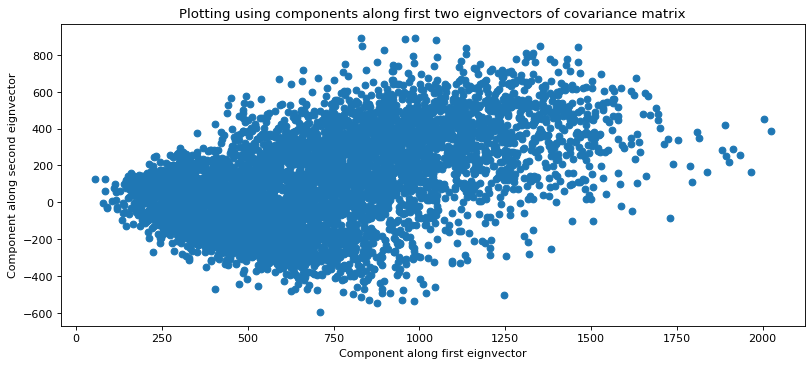

In [7]:
# Plotting code here
m,_ = train_data.shape
mu = np.mean(train_data,axis=0)
cov = np.matmul((train_data - mu).T,train_data - mu)/ (m)

w,v = np.linalg.eig(cov)
w = np.real(w)
idx = np.argsort(w)[::-1]
v = v[idx]

V1 = np.real(v[:,0])
V2 = np.real(v[:,1])
V1_comp = np.matmul(train_data,V1)
V2_comp = np.matmul(train_data,V2)

plt.figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(V1_comp,V2_comp)
plt.xlabel("Component along first eignvector")
plt.ylabel("Component along second eignvector")
plt.title("Plotting using components along first two eignvectors of covariance matrix")
plt.show()

## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [8]:
# Print accuracy on the test set using MLE
m,d = train_data.shape
mu = np.zeros((10,d))
sigma = np.zeros((10,d,d))
inv_sigma = np.zeros((10,d,d))
inv_determinant = np.zeros(10)

for i in range(10):
    sample_train_data = train_data[train_labels == i]
    mu[i,:] = np.mean(sample_train_data, axis = 0)
    sigma[i,:,:] = np.cov(sample_train_data.T)
    sigma[i,:,:] = np.matmul((sample_train_data - mu[i,:]).T,sample_train_data - mu[i,:]) / (m)
    inv_sigma[i,:,:] = np.linalg.pinv(sigma[i,:,:])
    k = np.linalg.matrix_rank(inv_sigma[i,:,:])
    eig,_ = np.linalg.eig(inv_sigma[i,:,:])
    eig = np.real(np.sort(eig)[::-1])
    inv_determinant[i] = np.sum(np.log(eig[:k]))

# def probability_estimate(i):
#     distance = np.diagonal(np.matmul(np.matmul(test_data-mu[i,:],inv_sigma[i,:,:]),(test_data-mu[i,:]).T))
#     return np.exp(-0.5 * distance)

m,d = test_data.shape
mle = np.zeros((m,10))

for i in range(10):
    distance = np.diagonal(np.matmul(np.matmul(test_data-mu[i,:],inv_sigma[i,:,:]),(test_data-mu[i,:]).T))
    mle[:,i] = 0.5*inv_determinant[i]-0.5 * distance

H = np.argmax(mle,axis=1)
print("Accuracy for MLE",100 * np.sum(H==test_labels)/test_labels.shape,"%")

Accuracy for MLE [74.4] %


In [9]:
# Print accuracy on the test set using MAP
# (assume a reasonable prior and mention it in the comments)
m,d = train_data.shape
mu = np.zeros((10,d))
sigma = np.zeros((10,d,d))
inv_sigma = np.zeros((10,d,d))
inv_determinant = np.zeros(10)

for i in range(10):
    sample_train_data = train_data[train_labels == i]
    mu[i,:] = np.mean(sample_train_data, axis = 0)
    sigma[i,:,:] = np.matmul((sample_train_data - mu[i,:]).T,sample_train_data - mu[i,:]) / (m)
    inv_sigma[i,:,:] = np.linalg.pinv(sigma[i,:,:])
    k = np.linalg.matrix_rank(inv_sigma[i,:,:])
    eig,_ = np.linalg.eig(inv_sigma[i,:,:])
    eig = np.real(np.sort(eig)[::-1])
    inv_determinant[i] = np.sum(np.log(eig[:k]))


# def probability_estimate(i):
#     distance = np.diagonal(np.matmul(np.matmul(test_data-mu[i,:],inv_sigma[i,:,:]),(test_data-mu[i,:]).T))
#     return np.exp(-0.5 * distance)

m,d = test_data.shape
mle = np.zeros((m,10))

for i in range(10):
    distance = np.diagonal(np.matmul(np.matmul(test_data-mu[i,:],inv_sigma[i,:,:]),(test_data-mu[i,:]).T))
    mle[:,i] = 0.5*inv_determinant[i]-0.5 * distance

H = np.argmax(mle,axis=1)
print("Accuracy for MAP",100 * np.sum(H==test_labels)/test_labels.shape,"%")

Accuracy for MAP [74.4] %


In [10]:
# Print accuracy using Bayesian pairwise majority voting method
m,d = train_data.shape
mu = np.zeros((10,d))
sigma = np.zeros((10,d,d))

for i in range(10):
    sample_train_data = train_data[train_labels == i]
    mu[i,:] = np.mean(sample_train_data, axis = 0)
    sigma[i,:,:] = np.matmul((sample_train_data - mu[i,:]).T,sample_train_data - mu[i,:])/ (m)

    
m,_ = test_data.shape
votes = np.zeros((m,10))

# def distance(x,i):
#     return np.matmul(np.matmul(x-mu[i,:],inv_sigma),(x-mu[i,:]).T)
for i in range(10):
    for j in range(i+1,10):
        sigma_approx = (sigma[i,:,:] + sigma[j,:,:])/2
        inv_sigma = np.linalg.pinv(sigma_approx)
        distance_i = np.diagonal(np.matmul(np.matmul(test_data-mu[i,:],inv_sigma),(test_data-mu[i,:]).T))
        distance_j = np.diagonal(np.matmul(np.matmul(test_data-mu[j,:],inv_sigma),(test_data-mu[j,:]).T))
        votes[distance_i<=distance_j,i] += 1
        votes[distance_i>=distance_j,j] += 1

H = np.argmax(votes,axis=1)
print("Accuracy for Bayesian pairwise majority voting method ",100 * np.sum(H==test_labels)/test_labels.shape,"%")

Accuracy for Bayesian pairwise majority voting method  [83.7] %


In [11]:
# Print accuracy using Simple Perpendicular Bisector majority voting method
m,d = train_data.shape
mu = np.zeros((10,d))

for i in range(10):
    sample_train_data = train_data[train_labels == i]
    mu[i,:] = np.mean(sample_train_data, axis = 0)

m,_ = test_data.shape
votes = np.zeros((m,10))

for i in range(10):
    for j in range(i+1,10):
        distance_i = np.diagonal(np.matmul(test_data-mu[i,:],(test_data-mu[i,:]).T))
        distance_j = np.diagonal(np.matmul(test_data-mu[j,:],(test_data-mu[j,:]).T))
        votes[distance_i<=distance_j,i] += 1
        votes[distance_i>=distance_j,j] += 1

H = np.argmax(votes,axis=1)
print("Accuracy for Simple Perpendicular Bisector majority voting method",100 * np.sum(H==test_labels)/test_labels.shape,"%")

Accuracy for Simple Perpendicular Bisector majority voting method [77.] %


### 1.3.3 Question 4
Compare performances and salient observations

---
Observations:
- Firstly, **MAP** and **MLE** accuracies are exactly same beacuse in the training dataset there are exactly 600 examples of each class and hence the apriori estimation is 0.1 in all case so probanility via MLE and MAP are same.
- Simple perpendicular bisector is simplest to code and is fastest to run but gives lesser accuracy on this test data than bayesian pairwise majority voting method.
- Mathematically MAP and MLE are most robust, without any assumptions which are carried by next methods, but it gives least accurate results.
- There are many numberical errors which emerge due to large size of matrixes which cause anomalies in the result, for example covariance matrix does not have rational eignvalues which cause numberical errors and reduces its rank than what it is matematically. Also method of generation of covariance matrix also seems to affect the results in part 1 using np.cov gives accuracy of 72.9 only while using matmult gives 74.4% accurary, which shows the presence of numberical errors.
---

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [12]:
# Your code here
# Print accuracies with K = 1, 3, 7

X = np.sum(np.square(train_data),axis=1)
Y = np.sum(np.square(test_data),axis=1)
XY = np.matmul(test_data,train_data.T)
a,b = np.meshgrid(X,Y)
distance_matrix = a + b - 2*XY
arg_sorted = np.argsort(distance_matrix,axis=1)
nearest_labels = np.take(train_labels,arg_sorted).astype('int64')

# For k=1
H = nearest_labels[:,0]
print("Accuracy for k=1",100 * np.sum(H==test_labels)/test_labels.shape,"%")

# For k=2
H = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=nearest_labels[:,:2])
print("Accuracy for k=2",100 * np.sum(H==test_labels)/test_labels.shape,"%")

# For k=3
H = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=nearest_labels[:,:3])
print("Accuracy for k=3",100 * np.sum(H==test_labels)/test_labels.shape,"%")

# For k=7
H = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=nearest_labels[:,:7])
print("Accuracy for k=7",100 * np.sum(H==test_labels)/test_labels.shape,"%")

# For k=11
H = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=nearest_labels[:,:11])
print("Accuracy for k=11",100 * np.sum(H==test_labels)/test_labels.shape,"%")


Accuracy for k=1 [90.7] %
Accuracy for k=2 [89.8] %
Accuracy for k=3 [91.6] %
Accuracy for k=7 [91.6] %
Accuracy for k=11 [90.8] %


### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

---
- Accuracies change depending on the number of neighbours considered for nearest neighbour estimation, which can have different samples.
- To select best K increase K iteratively until accuracies increase, also do this process for atleast k=10 as there might be local minimas and maximas, select the k with best accuracy.
---

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [13]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

(20, 784)


In [14]:
m,d = train_data.shape
n,d = mixed_data.shape
# argumented_train_data = np.zeros((m+n,d))
# argumented_train_data[:m,:] = train_data
# argumented_train_data[m:,:] = mixed_data

# argumented_train_labels = np.zeros(m+n)
# argumented_train_labels[:m] = train_labels
# argumented_train_labels[m:] = range(10,30)
mixed_labels = np.array(range(20))

X = np.sum(np.square(mixed_data),axis=1)
Y = np.sum(np.square(mixed_data),axis=1)
XY = np.matmul(mixed_data,mixed_data.T)
a,b = np.meshgrid(X,Y)
distance_matrix = a + b - 2*XY
arg_sorted = np.argsort(distance_matrix,axis=1)
nearest_labels = np.take(mixed_labels,arg_sorted).astype('int64')

visited = np.zeros(20)
K = 1

# For k=1
visited[nearest_labels[:,0]]+=1
H = mixed_labels[visited==1]
print("Outlilers indetified for k=1",H)

# For k=2
visited[nearest_labels[:,1]]+=1
H = mixed_labels[visited==1]
print("Outlilers indetified for k=2",H)

# For k=3
visited[nearest_labels[:,2]]+=1
H = mixed_labels[visited==1]
print("Outlilers indetified for k=3",H)
K=2

# For k=4
while K<4:
    visited[nearest_labels[:,K]]+=1
    K += 1
H = mixed_labels[visited==1]
print("Outlilers indetified for k=4",H)

# For k=5
while K<5:
    visited[nearest_labels[:,K]]+=1
    K += 1
H = mixed_labels[visited==1]
print("Outlilers indetified for k=5",H)

# For k=7
while K<7:
    visited[nearest_labels[:,K]]+=1
    K += 1
H = mixed_labels[visited==1]
print("Outlilers indetified for k=7",H)

# For k=9
while K<9:
    visited[nearest_labels[:,K]]+=1
    K += 1
H = mixed_labels[visited==1]
print("Outlilers indetified for k=9",H)
print()
print("Therefore the outlier is the 12th elemenet")

Outlilers indetified for k=1 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Outlilers indetified for k=2 [ 5  6 11 13 17 18 19]
Outlilers indetified for k=3 [ 5 11 13 17 18]
Outlilers indetified for k=4 [11]
Outlilers indetified for k=5 [11]
Outlilers indetified for k=7 [11]
Outlilers indetified for k=9 []

Therefore the outlier is the 12th elemenet


### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

---
On running KNN of data sample onto themselves, and checking neighbourhoods of each data while maintaining a count of which elements appeared how many times, elements appearing only 1 time(in their own neigbhourhood) are outliers as they don't resemble any other element of set closely. Also iteratively keep increasing value of k until set of outliers is reduced to a few elements.

---

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [15]:
# Your code here
train_neatness = train_labels/10
test_neatness = test_labels/10

X = np.sum(np.square(train_data),axis=1)
Y = np.sum(np.square(test_data),axis=1)
XY = np.matmul(test_data,train_data.T)
a,b = np.meshgrid(X,Y)
distance_matrix = a + b - 2*XY
arg_sorted = np.argsort(distance_matrix,axis=1)
nearest_labels = np.take(train_labels,arg_sorted).astype('int64')

# For k=1
H = nearest_labels[:,:1]
mae = np.mean(np.abs(np.mean(H,axis=1)-test_labels))/10
print("Mean absolute error for k=1",mae)

# For k=2
H = nearest_labels[:,:2]
mae = np.mean(np.abs(np.mean(H,axis=1)-test_labels))/10
print("Mean absolute error for k=2",mae)

# For k=3
H = nearest_labels[:,:3]
mae = np.mean(np.abs(np.mean(H,axis=1)-test_labels))/10
print("Mean absolute error for k=3",mae)

# For k=7
H = nearest_labels[:,:7]
mae = np.mean(np.abs(np.mean(H,axis=1)-test_labels))/10
print("Mean absolute error for k=7",mae)


Mean absolute error for k=1 0.0354
Mean absolute error for k=2 0.03515
Mean absolute error for k=3 0.03773333333333333
Mean absolute error for k=7 0.04377142857142857


---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---